In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
import shap
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

In [263]:
dataset_food_inflation_rate = pd.read_csv('./data/food_inflation_rate.csv')

In [123]:
dataset_food_inflation_rate.head()

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Element Code,Element,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,248,Åland Islands,2012,2012,23014,Food price inflation,7001,January,6121,Value,%,2.607987,E,Estimated value,NaN
1,CP,Consumer Price Indices,248,Åland Islands,2012,2012,23014,Food price inflation,7002,February,6121,Value,%,3.896104,E,Estimated value,NaN
2,CP,Consumer Price Indices,248,Åland Islands,2012,2012,23014,Food price inflation,7003,March,6121,Value,%,2.967121,E,Estimated value,NaN
3,CP,Consumer Price Indices,248,Åland Islands,2012,2012,23014,Food price inflation,7004,April,6121,Value,%,2.149682,E,Estimated value,NaN
4,CP,Consumer Price Indices,248,Åland Islands,2012,2012,23014,Food price inflation,7005,May,6121,Value,%,3.559871,E,Estimated value,NaN


In [124]:
dataset_food_inflation_rate = dataset_food_inflation_rate[['Area', 'Year', 'Months', 'Value']]

In [125]:
dataset_food_inflation_rate = dataset_food_inflation_rate.rename(columns = {'Value': 'Food Inflation Rate'})

In [126]:
dataset_food_inflation_rate.head()

,Area,Year,Months,Food Inflation Rate
0,Åland Islands,2012,January,2.607987
1,Åland Islands,2012,February,3.896104
2,Åland Islands,2012,March,2.967121
3,Åland Islands,2012,April,2.149682
4,Åland Islands,2012,May,3.559871


In [127]:
dataset_food_inflation_rate = dataset_food_inflation_rate.groupby(['Area', 'Year'], as_index=False)['Food Inflation Rate'].mean()

In [128]:
dataset_food_inflation_rate.head()

,Area,Year,Food Inflation Rate
0,Albania,2012,2.404087
1,Albania,2013,4.214607
2,Albania,2014,2.212385
3,Albania,2015,4.294233
4,Albania,2016,3.254620


In [129]:
dataset_food_inflation_rate.isnull().sum()

Area                   0
Year                   0
Food Inflation Rate    0
dtype: int64

In [130]:
dataset_raw_gdp = pd.read_csv('./data/raw_gdp.csv')

In [131]:
dataset_raw_gdp.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,MK,Macro Indicators,8,Albania,6110,Value US$,22008,Gross Domestic Product,2012,2012,million USD,12319.779604,X,Figure from international organizations,NaN
1,MK,Macro Indicators,8,Albania,6110,Value US$,22008,Gross Domestic Product,2013,2013,million USD,12776.280738,X,Figure from international organizations,NaN
2,MK,Macro Indicators,8,Albania,6110,Value US$,22008,Gross Domestic Product,2014,2014,million USD,13228.240079,X,Figure from international organizations,NaN
3,MK,Macro Indicators,8,Albania,6110,Value US$,22008,Gross Domestic Product,2015,2015,million USD,11386.924853,X,Figure from international organizations,NaN
4,MK,Macro Indicators,8,Albania,6110,Value US$,22008,Gross Domestic Product,2016,2016,million USD,11861.356451,X,Figure from international organizations,NaN


In [132]:
dataset_raw_gdp = dataset_raw_gdp[['Area', 'Year', 'Value']]

In [133]:
dataset_raw_gdp = dataset_raw_gdp.rename(columns = {'Value': 'Raw GDP'})

In [134]:
dataset_raw_gdp.head()

,Area,Year,Raw GDP
0,Albania,2012,12319.779604
1,Albania,2013,12776.280738
2,Albania,2014,13228.240079
3,Albania,2015,11386.924853
4,Albania,2016,11861.356451


In [135]:
dataset_raw_gdp.isnull().sum()

Area       0
Year       0
Raw GDP    0
dtype: int64

In [136]:
dataset_gdp_growth_rate = pd.read_csv('./data/gdp_growth_rate.csv')

In [137]:
dataset_gdp_growth_rate.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,MK,Macro Indicators,8,Albania,6129,Annual growth US$,22008,Gross Domestic Product,2012,2012,%,-4.430218,X,Figure from international organizations,NaN
1,MK,Macro Indicators,8,Albania,6129,Annual growth US$,22008,Gross Domestic Product,2013,2013,%,3.705432,X,Figure from international organizations,NaN
2,MK,Macro Indicators,8,Albania,6129,Annual growth US$,22008,Gross Domestic Product,2014,2014,%,3.537487,X,Figure from international organizations,NaN
3,MK,Macro Indicators,8,Albania,6129,Annual growth US$,22008,Gross Domestic Product,2015,2015,%,-13.919579,X,Figure from international organizations,NaN
4,MK,Macro Indicators,8,Albania,6129,Annual growth US$,22008,Gross Domestic Product,2016,2016,%,4.166459,X,Figure from international organizations,NaN


In [138]:
dataset_gdp_growth_rate.isnull().sum()

Domain Code           0
Domain                0
Area Code (M49)       0
Area                  0
Element Code          0
Element               0
Item Code             0
Item                  0
Year Code             0
Year                  0
Unit                  0
Value                 0
Flag                  0
Flag Description      0
Note                515
dtype: int64

In [139]:
dataset_gdp_growth_rate = dataset_gdp_growth_rate[['Area', 'Year', 'Value']]

In [140]:
dataset_gdp_growth_rate = dataset_gdp_growth_rate.rename(columns = {"Value": "GDP Growth Rate"})

In [141]:
dataset_gdp_growth_rate.head()

,Area,Year,GDP Growth Rate
0,Albania,2012,-4.430218
1,Albania,2013,3.705432
2,Albania,2014,3.537487
3,Albania,2015,-13.919579
4,Albania,2016,4.166459


In [142]:
dataset_gdp_growth_rate.isnull().sum()

Area               0
Year               0
GDP Growth Rate    0
dtype: int64

In [143]:
dataset_producer_prices = pd.read_csv('./data/producer_prices.csv')

In [144]:
dataset_producer_prices.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PP,Producer Prices,8,Albania,5532,Producer Price (USD/tonne),01341,Apples,2012,2012,7021,Annual value,USD,369.7,A,Official figure
1,PP,Producer Prices,8,Albania,5532,Producer Price (USD/tonne),01341,Apples,2013,2013,7021,Annual value,USD,492.1,A,Official figure
2,PP,Producer Prices,8,Albania,5532,Producer Price (USD/tonne),01341,Apples,2014,2014,7021,Annual value,USD,474.8,A,Official figure
3,PP,Producer Prices,8,Albania,5532,Producer Price (USD/tonne),01341,Apples,2015,2015,7021,Annual value,USD,389.0,A,Official figure
4,PP,Producer Prices,8,Albania,5532,Producer Price (USD/tonne),01341,Apples,2016,2016,7021,Annual value,USD,381.3,A,Official figure


In [145]:
dataset_producer_prices.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Months Code         0
Months              0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [146]:
dataset_producer_prices = dataset_producer_prices[['Area', 'Year', 'Item', 'Value']]

In [147]:
dataset_producer_prices = dataset_producer_prices.rename(columns={"Value": "Item Price Per Tonne"})

In [148]:
dataset_producer_prices.head()

,Area,Year,Item,Item Price Per Tonne
0,Albania,2012,Apples,369.7
1,Albania,2013,Apples,492.1
2,Albania,2014,Apples,474.8
3,Albania,2015,Apples,389.0
4,Albania,2016,Apples,381.3


In [149]:
dataset_overall_inflation = pd.read_excel('./data/overall_inflation.xlsx')

In [150]:
dataset_overall_inflation.head()

,Data extracted on 22/07/2024 23:21:37 from [ESTAT],Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Dataset:,HICP - inflation rate [tec00118],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last updated:,17/07/2024 11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Time frequency,NaN,Annual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Unit of measure,NaN,Annual average rate of change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
dataset_overall_inflation.isnull().sum()

Data extracted on 22/07/2024 23:21:37 from [ESTAT]     3
Unnamed: 1                                             9
Unnamed: 2                                            49
Unnamed: 3                                            13
Unnamed: 4                                            52
Unnamed: 5                                            13
Unnamed: 6                                            52
Unnamed: 7                                            13
Unnamed: 8                                            52
Unnamed: 9                                            13
Unnamed: 10                                           51
Unnamed: 11                                           13
Unnamed: 12                                           49
Unnamed: 13                                           13
Unnamed: 14                                           49
Unnamed: 15                                           13
Unnamed: 16                                           49
Unnamed: 17                    

In [152]:
columns_to_drop = [f'Unnamed: {i}' for i in range(2, 25) if i % 2 == 0]
columns_to_drop

['Unnamed: 2',
 'Unnamed: 4',
 'Unnamed: 6',
 'Unnamed: 8',
 'Unnamed: 10',
 'Unnamed: 12',
 'Unnamed: 14',
 'Unnamed: 16',
 'Unnamed: 18',
 'Unnamed: 20',
 'Unnamed: 22',
 'Unnamed: 24']

In [153]:
dataset_overall_inflation = dataset_overall_inflation[12:51]

In [154]:
dataset_overall_inflation = dataset_overall_inflation.drop(columns=columns_to_drop)

In [155]:
columns_to_stay = [f'Unnamed: {i}' for i in range(1, 25) if i % 2 == 1]

In [156]:
dict_rename_columns = {}

In [157]:
for prev_name, year in zip(columns_to_stay, range(2012, 2024)):
    dict_rename_columns[prev_name] = year

In [158]:
dict_rename_columns

{'Unnamed: 1': 2012,
 'Unnamed: 3': 2013,
 'Unnamed: 5': 2014,
 'Unnamed: 7': 2015,
 'Unnamed: 9': 2016,
 'Unnamed: 11': 2017,
 'Unnamed: 13': 2018,
 'Unnamed: 15': 2019,
 'Unnamed: 17': 2020,
 'Unnamed: 19': 2021,
 'Unnamed: 21': 2022,
 'Unnamed: 23': 2023}

In [159]:
dict_rename_columns['Data extracted on 22/07/2024 23:21:37 from [ESTAT]'] = 'Area'

In [160]:
dataset_overall_inflation = dataset_overall_inflation.rename(columns=dict_rename_columns)

In [161]:
dataset_overall_inflation

,Area,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
12,Belgium,2.6,1.2,0.5,0.6,1.8,2.2,2.3,1.2,0.4,3.2,10.3,2.3
13,Bulgaria,2.4,0.4,-1.6,-1.1,-1.3,1.2,2.6,2.5,1.2,2.8,13,8.6
14,Czechia,3.5,1.4,0.4,0.3,0.6,2.4,2,2.6,3.3,3.3,14.8,12
15,Denmark,2.4,0.5,0.4,0.2,0,1.1,0.7,0.7,0.3,1.9,8.5,3.4
16,Germany,2.2,1.6,0.8,0.7,0.4,1.7,1.9,1.4,0.4,3.2,8.7,6
17,Estonia,4.2,3.2,0.5,0.1,0.8,3.7,3.4,2.3,-0.6,4.5,19.4,9.1
18,Ireland,1.9,0.5,0.3,0,-0.2,0.3,0.7,0.9,-0.5,2.4,8.1,5.2
19,Greece,1,-0.9,-1.4,-1.1,0,1.1,0.8,0.5,-1.3,0.6,9.3,4.2
20,Spain,2.4,1.5,-0.2,-0.6,-0.3,2,1.7,0.8,-0.3,3,8.3,3.4
21,France,2.2,1,0.6,0.1,0.3,1.2,2.1,1.3,0.5,2.1,5.9,5.7


In [162]:
dataset_overall_inflation = dataset_overall_inflation.melt(id_vars=['Area'], var_name='Year', value_name='Overall Inflation Rate')

In [163]:
dataset_overall_inflation = dataset_overall_inflation[dataset_overall_inflation['Area']!='Liechtenstein']

In [164]:
#pd.set_option('future.no_silent_downcasting', True)
dataset_overall_inflation = dataset_overall_inflation.replace(to_replace=":", value=np.nan)

/var/folders/sk/5p85qfdj4gs6687j53mbs7rw0000gn/T/ipykernel_20599/795541574.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset_overall_inflation = dataset_overall_inflation.replace(to_replace=":", value=np.nan)


In [165]:
dataset_overall_inflation = dataset_overall_inflation.sort_values(by=['Area', 'Year'])

In [166]:
df = dataset_overall_inflation.copy()

In [167]:
dataset_overall_inflation.head()

,Area,Year,Overall Inflation Rate
34,Albania,2012,NaN
73,Albania,2013,NaN
112,Albania,2014,NaN
151,Albania,2015,NaN
190,Albania,2016,NaN


In [168]:
dataset_overall_inflation.isnull().sum()

Area                       0
Year                       0
Overall Inflation Rate    18
dtype: int64

<Axes: >

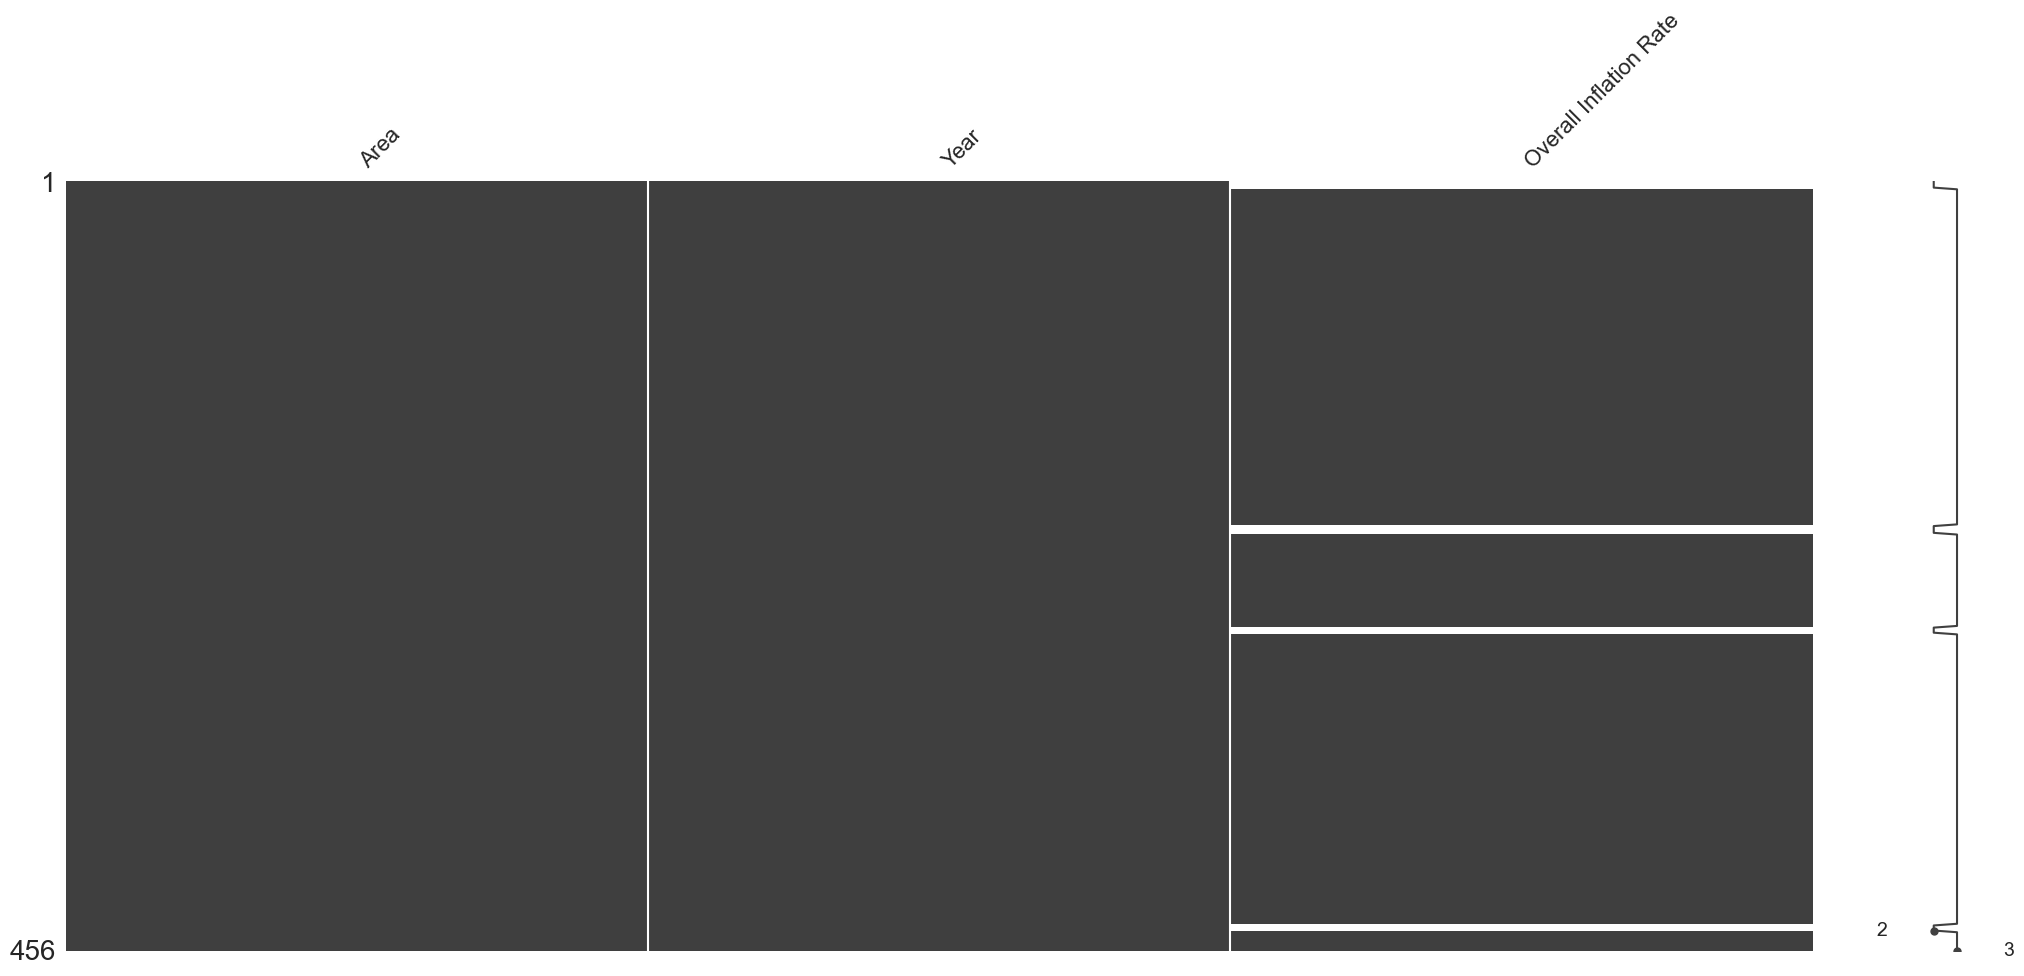

In [169]:
msno.matrix(df) 

In [170]:
tmp = dataset_overall_inflation.groupby('Area')['Overall Inflation Rate'].apply(lambda group: group.fillna(method='bfill')).reset_index()

/var/folders/sk/5p85qfdj4gs6687j53mbs7rw0000gn/T/ipykernel_20599/901236023.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tmp = dataset_overall_inflation.groupby('Area')['Overall Inflation Rate'].apply(lambda group: group.fillna(method='bfill')).reset_index()


In [171]:
tmp = tmp.rename(columns={'level_1': 'index'})

In [172]:
tmp = tmp.set_index('index')

In [173]:
dataset_overall_inflation['Overall Inflation Rate'] = tmp['Overall Inflation Rate']

In [174]:
tmp = dataset_overall_inflation.groupby('Area')['Overall Inflation Rate'].apply(lambda group: group.fillna(method='ffill')).reset_index()

/var/folders/sk/5p85qfdj4gs6687j53mbs7rw0000gn/T/ipykernel_20599/1717314096.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tmp = dataset_overall_inflation.groupby('Area')['Overall Inflation Rate'].apply(lambda group: group.fillna(method='ffill')).reset_index()


In [175]:
tmp = tmp.rename(columns={'level_1': 'index'})

In [176]:
tmp = tmp.set_index('index')

In [177]:
dataset_overall_inflation['Overall Inflation Rate'] = tmp['Overall Inflation Rate']

In [178]:
dataset_overall_inflation

,Area,Year,Overall Inflation Rate
34,Albania,2012,3.2
73,Albania,2013,3.2
112,Albania,2014,3.2
151,Albania,2015,3.2
190,Albania,2016,3.2
...,...,...,...
311,United States,2019,1.4
350,United States,2020,0.8
389,United States,2021,5.3
428,United States,2022,8.7


In [179]:
data = pd.merge(dataset_food_inflation_rate, dataset_raw_gdp, on=['Area', 'Year'], how='inner')

In [180]:
data

,Area,Year,Food Inflation Rate,Raw GDP
0,Albania,2012,2.404087,1.231978e+04
1,Albania,2013,4.214607,1.277628e+04
2,Albania,2014,2.212385,1.322824e+04
3,Albania,2015,4.294233,1.138692e+04
4,Albania,2016,3.254620,1.186136e+04
...,...,...,...,...
487,United Kingdom of Great Britain and Northern I...,2019,1.374278,2.851407e+06
488,United Kingdom of Great Britain and Northern I...,2020,0.721408,2.697807e+06
489,United Kingdom of Great Britain and Northern I...,2021,0.304925,3.141506e+06
490,United Kingdom of Great Britain and Northern I...,2022,10.894987,3.089073e+06


In [181]:
data = pd.merge(data, dataset_gdp_growth_rate, on=['Area', 'Year'], how='inner')

In [182]:
data

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate
0,Albania,2012,2.404087,1.231978e+04,-4.430218
1,Albania,2013,4.214607,1.277628e+04,3.705432
2,Albania,2014,2.212385,1.322824e+04,3.537487
3,Albania,2015,4.294233,1.138692e+04,-13.919579
4,Albania,2016,3.254620,1.186136e+04,4.166459
...,...,...,...,...,...
487,United Kingdom of Great Britain and Northern I...,2019,1.374278,2.851407e+06,-0.694212
488,United Kingdom of Great Britain and Northern I...,2020,0.721408,2.697807e+06,-5.386835
489,United Kingdom of Great Britain and Northern I...,2021,0.304925,3.141506e+06,16.446678
490,United Kingdom of Great Britain and Northern I...,2022,10.894987,3.089073e+06,-1.669055


In [183]:
data = pd.merge(data, dataset_producer_prices, on=['Area', 'Year'], how='inner')

In [184]:
data

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne
0,Albania,2012,2.404087,1.231978e+04,-4.430218,Apples,369.7
1,Albania,2012,2.404087,1.231978e+04,-4.430218,Apricots,489.9
2,Albania,2012,2.404087,1.231978e+04,-4.430218,Barley,316.1
3,Albania,2012,2.404087,1.231978e+04,-4.430218,"Beans, dry",1562.2
4,Albania,2012,2.404087,1.231978e+04,-4.430218,Cabbages,203.4
...,...,...,...,...,...,...,...
18671,United Kingdom of Great Britain and Northern I...,2022,10.894987,3.089073e+06,-1.669055,"Shorn wool, greasy, including fleece-washed sh...",322.9
18672,United Kingdom of Great Britain and Northern I...,2022,10.894987,3.089073e+06,-1.669055,Strawberries,4004.6
18673,United Kingdom of Great Britain and Northern I...,2022,10.894987,3.089073e+06,-1.669055,Sugar beet,45.8
18674,United Kingdom of Great Britain and Northern I...,2022,10.894987,3.089073e+06,-1.669055,Tomatoes,1565.6


In [185]:
dataset_overall_inflation['Area'].unique()

array(['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo*',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro',
       'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Türkiye', 'United Kingdom', 'United States'],
      dtype=object)

In [186]:
data = pd.merge(data, dataset_overall_inflation, on=['Area', 'Year'], how='inner')

In [187]:
data.head()

,Area,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item,Item Price Per Tonne,Overall Inflation Rate
0,Albania,2012,2.404087,12319.779604,-4.430218,Apples,369.7,3.2
1,Albania,2012,2.404087,12319.779604,-4.430218,Apricots,489.9,3.2
2,Albania,2012,2.404087,12319.779604,-4.430218,Barley,316.1,3.2
3,Albania,2012,2.404087,12319.779604,-4.430218,"Beans, dry",1562.2,3.2
4,Albania,2012,2.404087,12319.779604,-4.430218,Cabbages,203.4,3.2


In [188]:
data.isnull().sum()

Area                      0
Year                      0
Food Inflation Rate       0
Raw GDP                   0
GDP Growth Rate           0
Item                      0
Item Price Per Tonne      0
Overall Inflation Rate    0
dtype: int64

In [189]:
data['Area'].unique()

array(['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'North Macedonia', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland'], dtype=object)

In [190]:
data['Area'] = data['Area'].replace('North Macedonia', 'Macedonia')

In [191]:
data['Area'].unique()

array(['Albania', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Macedonia', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland'], dtype=object)

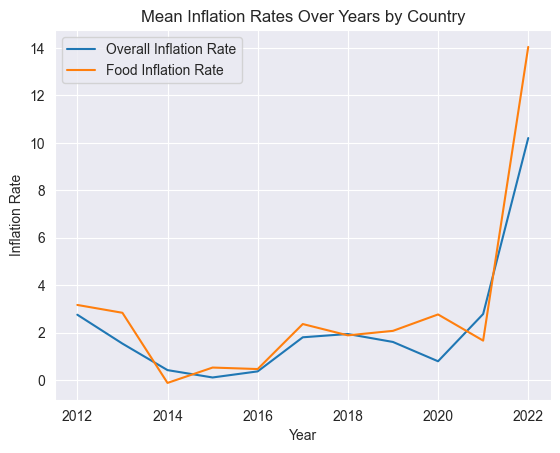

In [192]:
grouped_overall = data.groupby('Year')['Overall Inflation Rate'].mean()
grouped_food=data.groupby('Year')['Food Inflation Rate'].mean()
plt.plot(grouped_overall,label='Overall Inflation Rate')
plt.plot(grouped_food,label='Food Inflation Rate')
plt.title('Mean Inflation Rates Over Years by Country')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.legend()
plt.grid(True)
plt.show()

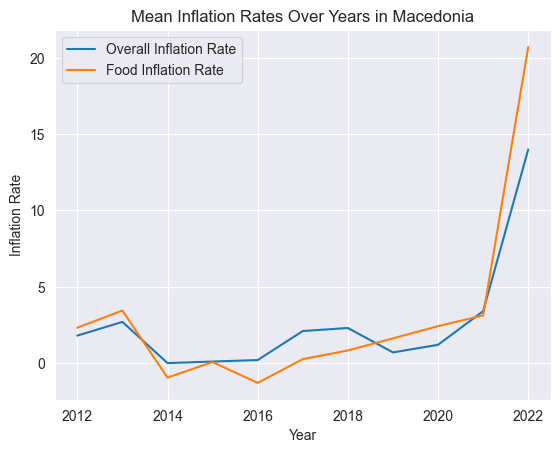

In [193]:
country_data = data[data['Area'] == 'Macedonia']
grouped_overall = country_data.groupby('Year')['Overall Inflation Rate'].mean()
grouped_food=country_data.groupby('Year')['Food Inflation Rate'].mean()
plt.plot(grouped_overall,label='Overall Inflation Rate')
plt.plot(grouped_food,label='Food Inflation Rate')
plt.title('Mean Inflation Rates Over Years in Macedonia')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.legend()
plt.grid(True)
plt.show()

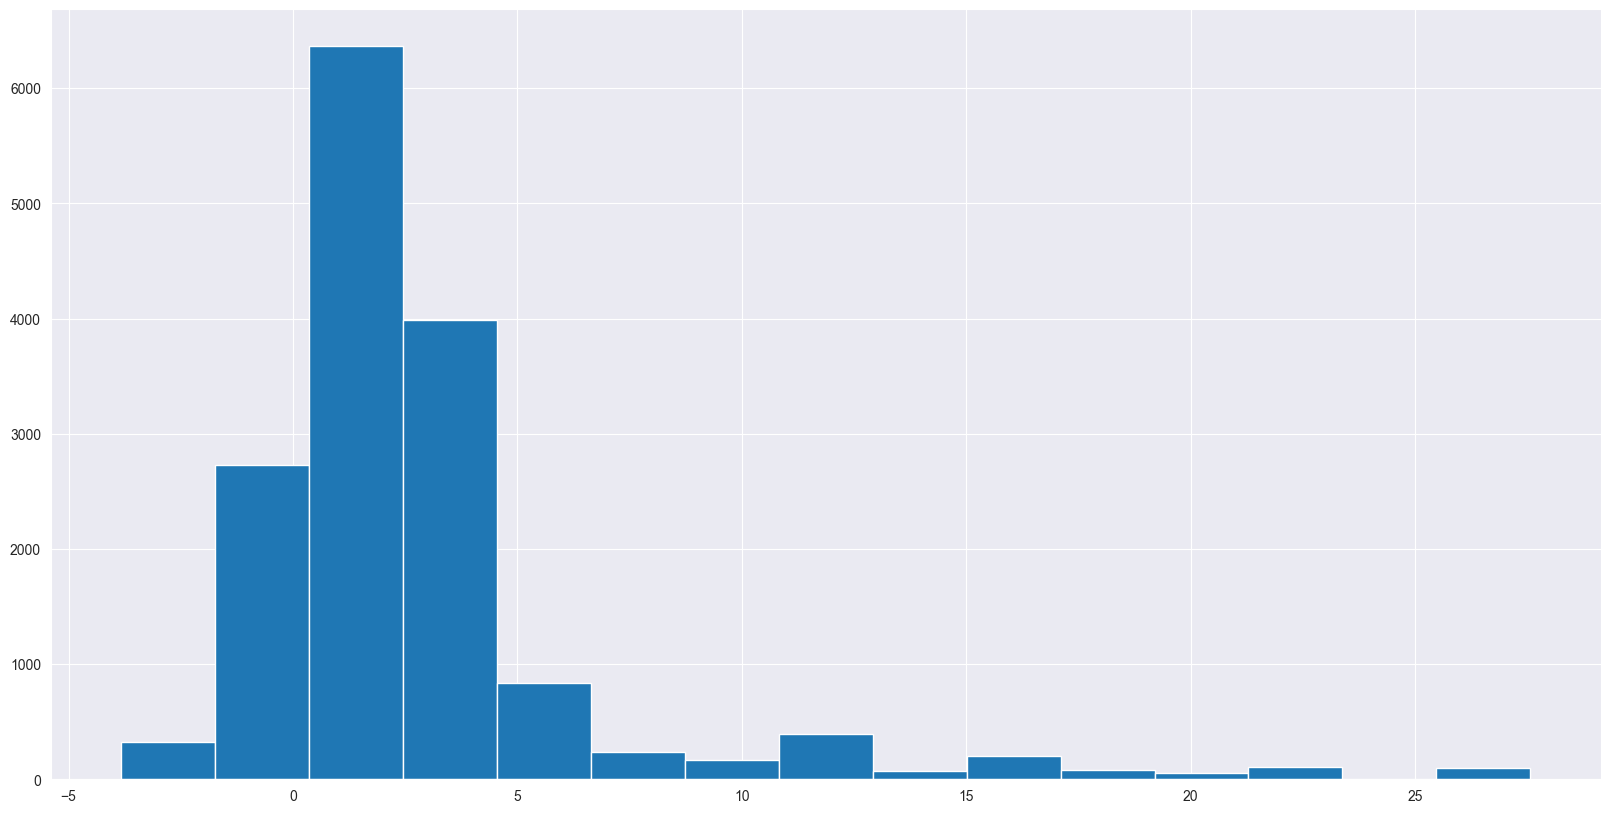

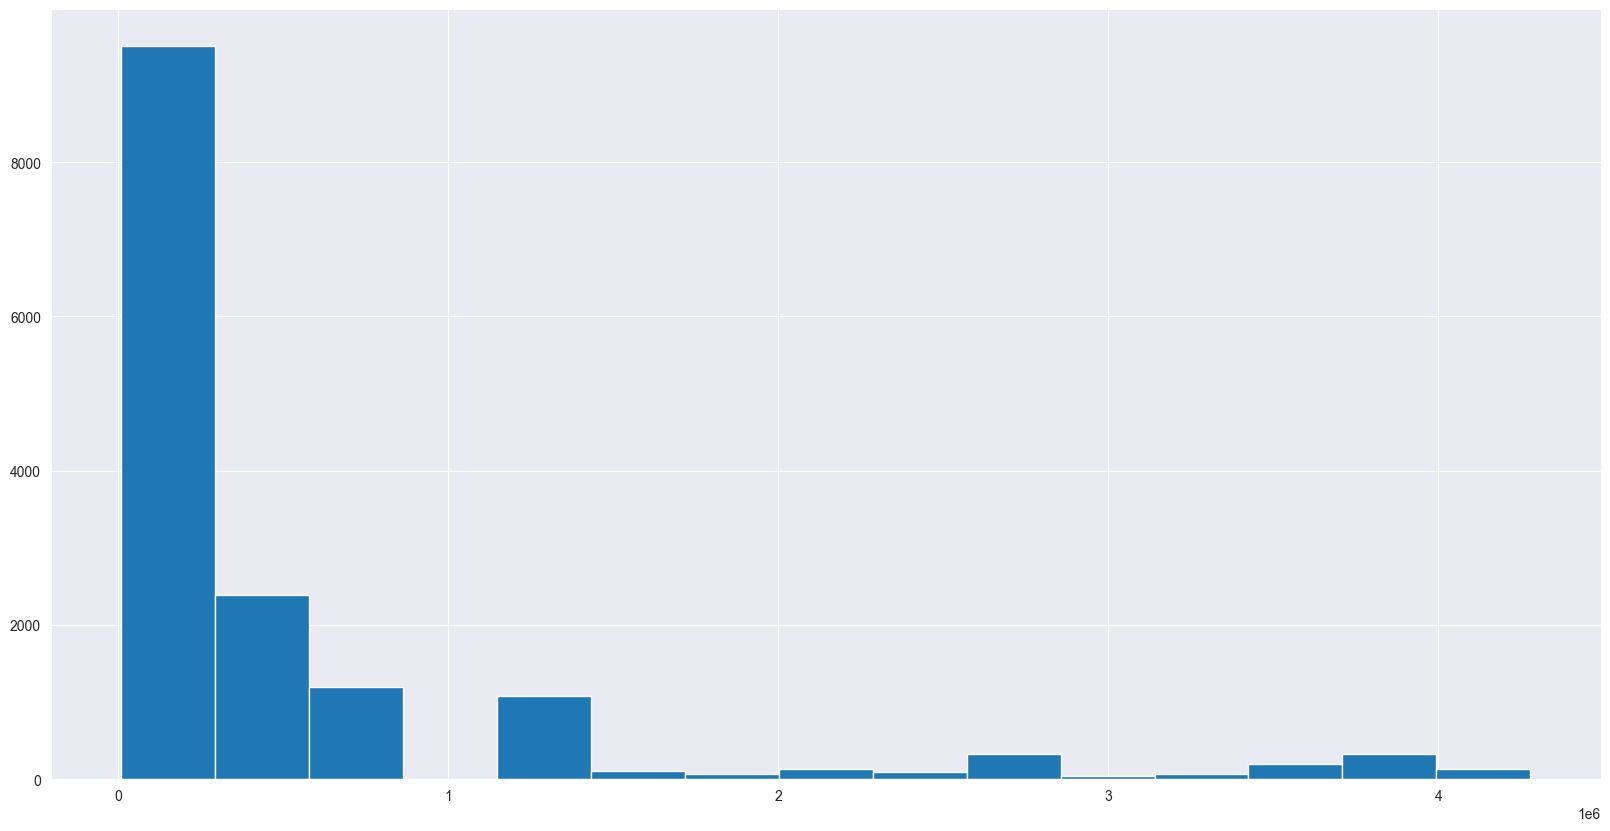

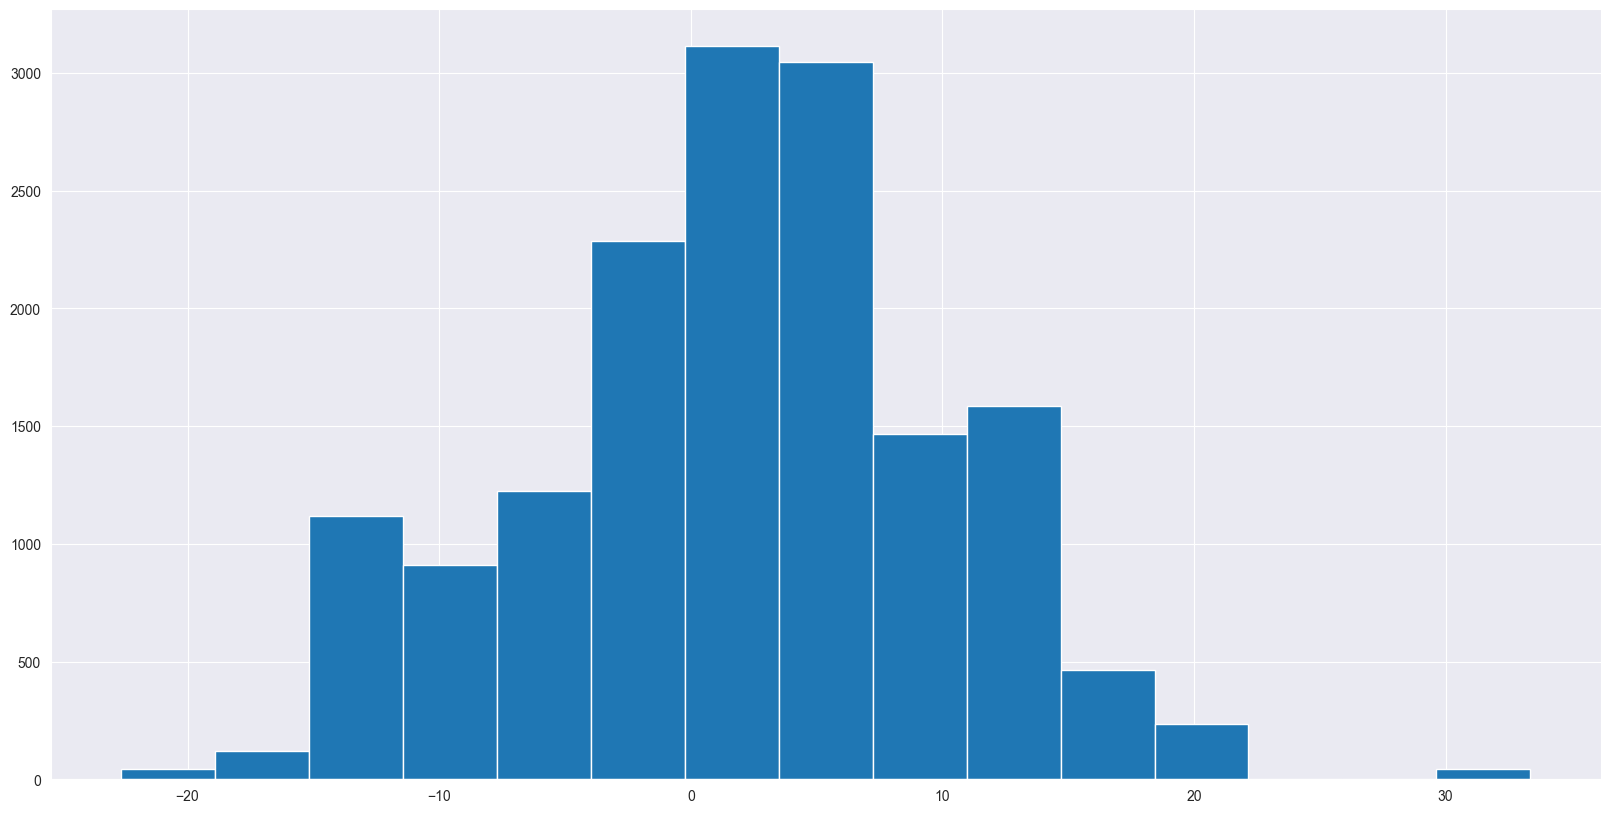

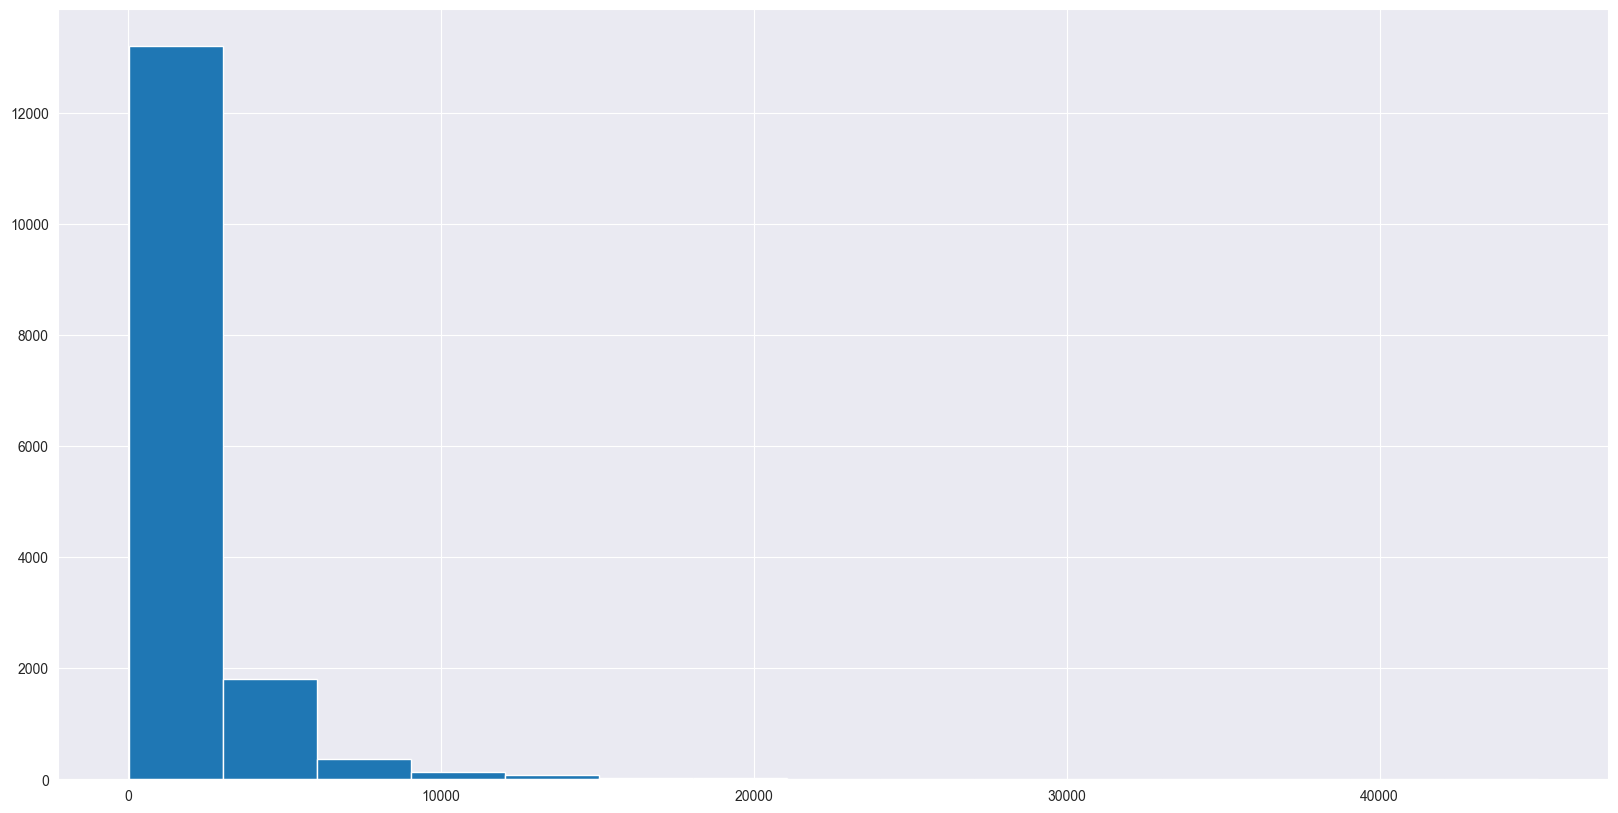

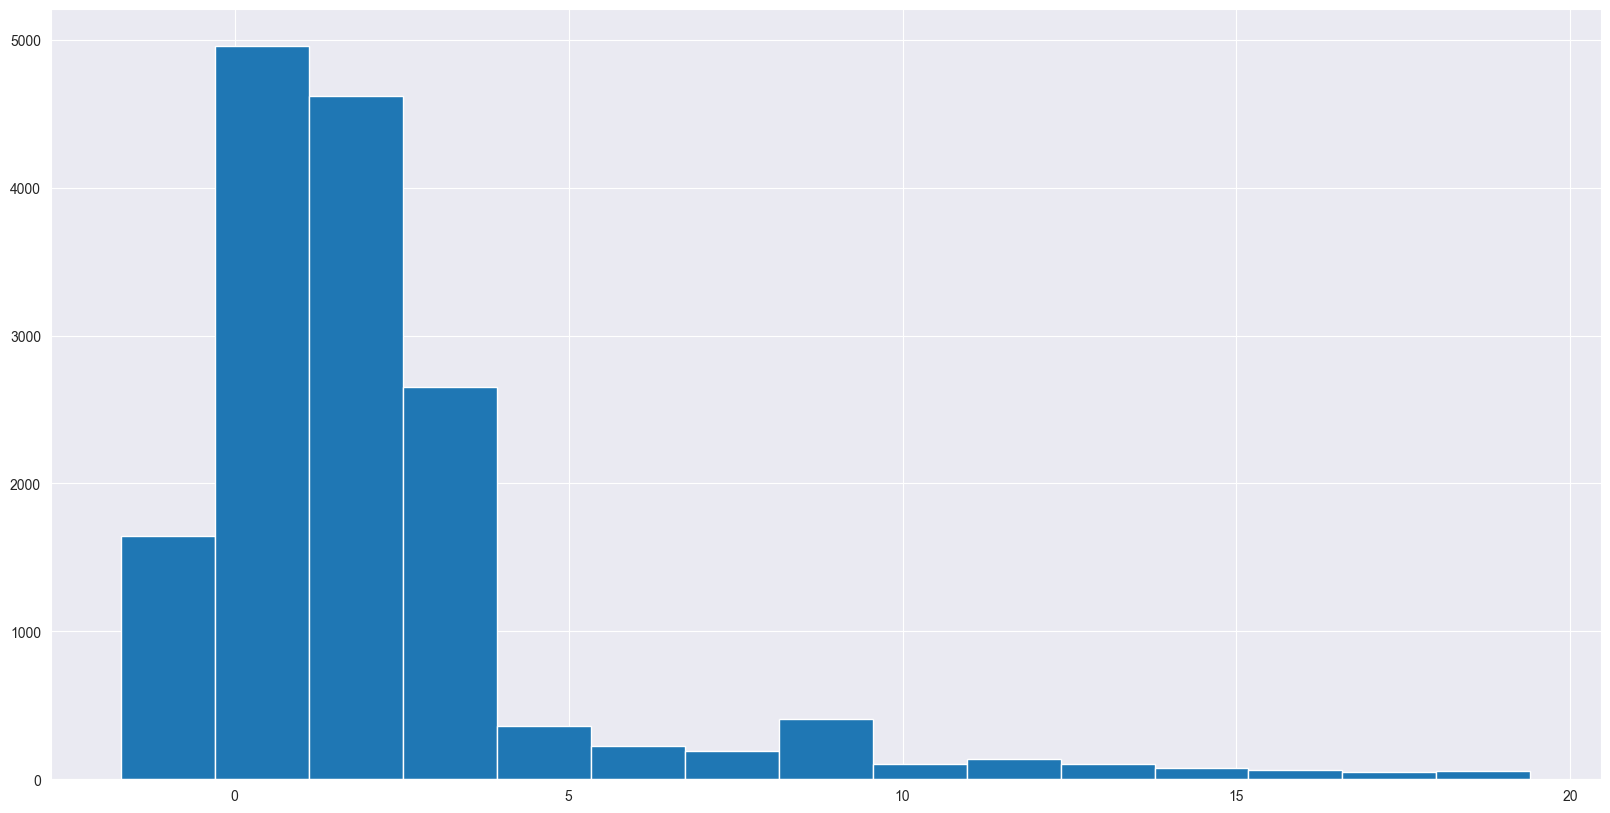

In [194]:
numerical_columns=['Food Inflation Rate', 'Raw GDP', 'GDP Growth Rate','Item Price Per Tonne', 'Overall Inflation Rate']
for column in numerical_columns:
    plt.figure(figsize=(20, 10))
    plt.hist(data[column], bins=15)
    plt.show()

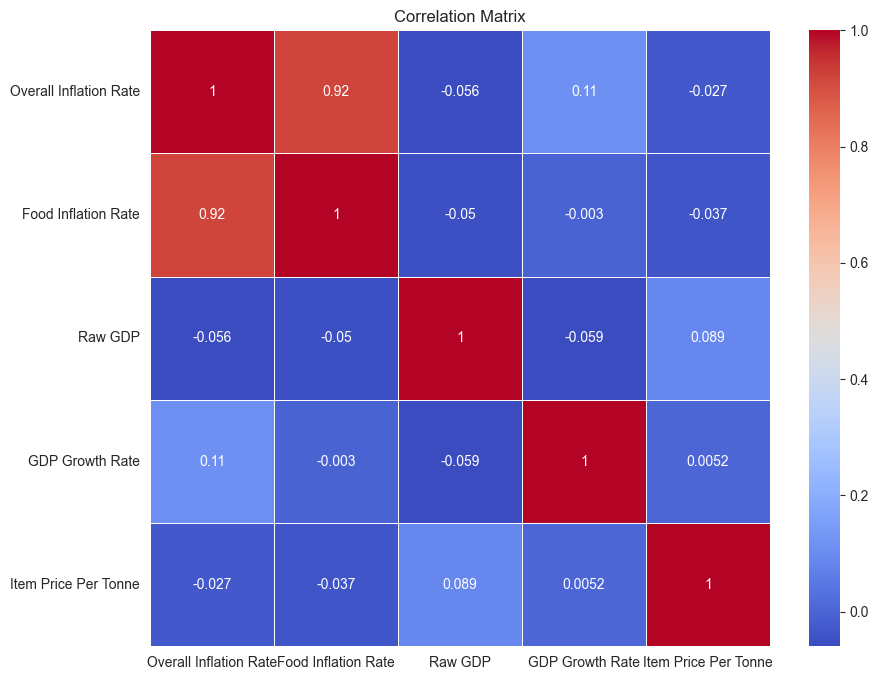

In [195]:
columns_of_interest = ['Overall Inflation Rate', 'Food Inflation Rate', 'Raw GDP', 'GDP Growth Rate', 'Item Price Per Tonne']
correlation_matrix = data[columns_of_interest].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [196]:
import category_encoders as ce

binary_encoder = ce.BinaryEncoder(cols=['Item', 'Area'])
data=binary_encoder.fit_transform(data)


In [197]:
scaler = RobustScaler()
numerical_columns.append('Year')
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [198]:
data.head()

,Area_0,Area_1,Area_2,Area_3,Area_4,Year,Food Inflation Rate,Raw GDP,GDP Growth Rate,Item_0,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item Price Per Tonne,Overall Inflation Rate
0,0,0,0,0,1,-0.833333,0.160705,-0.422628,-0.784202,0,0,0,0,0,0,0,1,-0.299190,0.708333
1,0,0,0,0,1,-0.833333,0.160705,-0.422628,-0.784202,0,0,0,0,0,0,1,0,-0.229156,0.708333
2,0,0,0,0,1,-0.833333,0.160705,-0.422628,-0.784202,0,0,0,0,0,0,1,1,-0.330420,0.708333
3,0,0,0,0,1,-0.833333,0.160705,-0.422628,-0.784202,0,0,0,0,0,1,0,0,0.395618,0.708333
4,0,0,0,0,1,-0.833333,0.160705,-0.422628,-0.784202,0,0,0,0,0,1,0,1,-0.396085,0.708333


In [199]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

km = KMeans(2)
km.fit(data)
clusters = km.labels_.tolist()


In [200]:
pca = PCA(2)

data_new = pca.fit_transform(data)
data_new

array([[ 0.81400146, -0.9259635 ],
       [ 0.8114005 , -0.92569574],
       [ 0.81731895, -0.92941499],
       ...,
       [-1.15370527,  0.99860877],
       [-0.53025352,  0.50385184],
       [-0.36413656,  0.37506556]])

In [201]:
label = km.fit_predict(data_new)

u_labels = np.unique(label)

labels = km.labels_
u_labels

array([0, 1], dtype=int32)

In [202]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

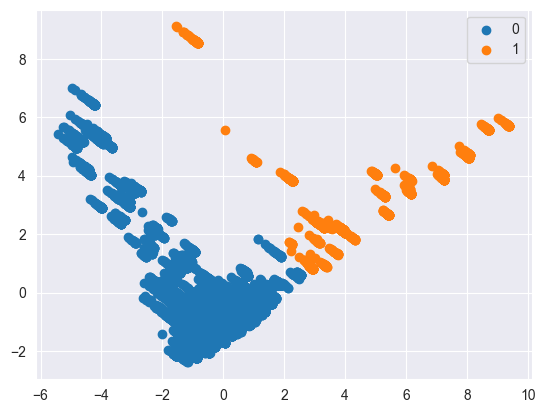

In [203]:
for i in u_labels:
    plt.scatter(data_new[label == i , 0] , data_new[label == i , 1] , label = i)
plt.legend()

In [226]:
df_new = data.copy()
# df_new=binary_encoder.inverse_transform(df_new)
# df_new[numerical_columns] = scaler.inverse_transform(data[numerical_columns])
df_new['label']=labels


In [205]:
df_new.groupby(['Area','Year'])['label'].sum()

Area         Year  
Albania      2012.0    0
             2013.0    0
             2014.0    0
             2015.0    0
             2016.0    0
                      ..
Switzerland  2018.0    0
             2019.0    0
             2020.0    0
             2021.0    0
             2022.0    0
Name: label, Length: 340, dtype: int32

In [213]:
data.count()

Area_0                    15649
Area_1                    15649
Area_2                    15649
Area_3                    15649
Area_4                    15649
Year                      15649
Food Inflation Rate       15649
Raw GDP                   15649
GDP Growth Rate           15649
Item_0                    15649
Item_1                    15649
Item_2                    15649
Item_3                    15649
Item_4                    15649
Item_5                    15649
Item_6                    15649
Item_7                    15649
Item Price Per Tonne      15649
Overall Inflation Rate    15649
dtype: int64

In [270]:
X,Y=df_new.drop(columns=['label']),df_new['label']

ros = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = ros.fit_resample(X, Y)

x_train,x_test,y_train,y_test = train_test_split(X_resampled,Y_resampled,test_size=0.2,random_state=42)

In [272]:
count_label_1 = (y_test == 0).sum()
print(f"Number of labels '1' in y_train: {count_label_1}")

Number of labels '1' in y_train: 2922


In [315]:
classifier = XGBClassifier(n_estimators=40, max_depth=2, learning_rate = 0.0001, objective="binary:logistic")
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [316]:
preds=classifier.predict(x_test)

In [317]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2911
           1       1.00      1.00      1.00      2851

    accuracy                           1.00      5762
   macro avg       1.00      1.00      1.00      5762
weighted avg       1.00      1.00      1.00      5762


In [319]:
explainer = shap.Explainer(classifier)

# Compute SHAP values for the training set
shap_values = explainer(x_train)

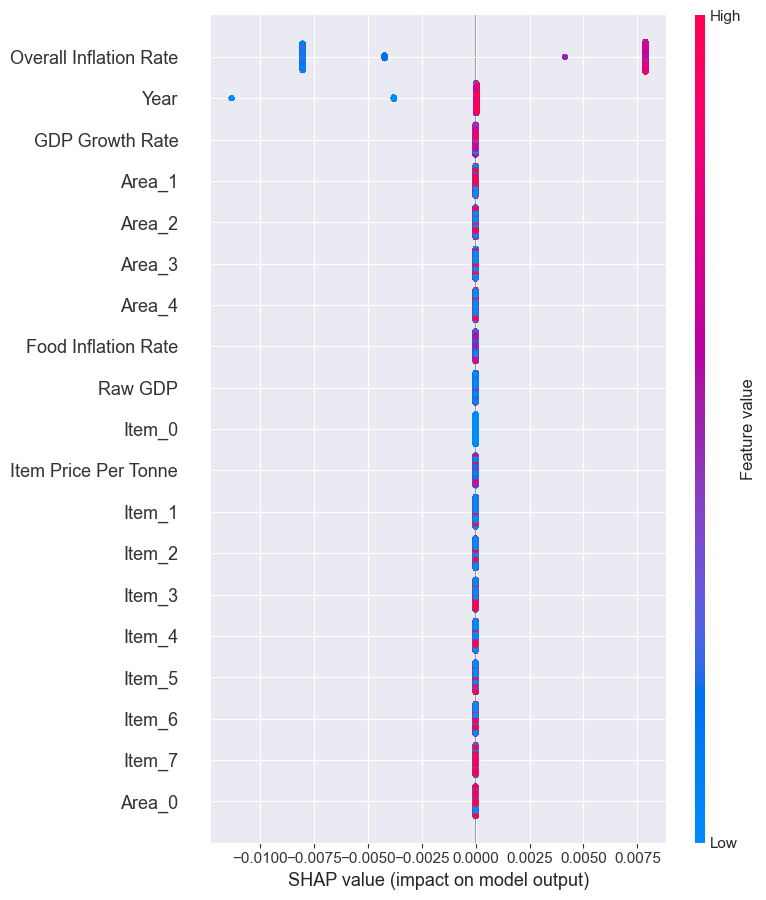

In [320]:
shap.summary_plot(shap_values, x_train)

In [325]:
shap.bar_plot(shap_values)

KeyboardInterrupt: 

In [326]:
print(type(shap_values))


<class 'shap._explanation.Explanation'>


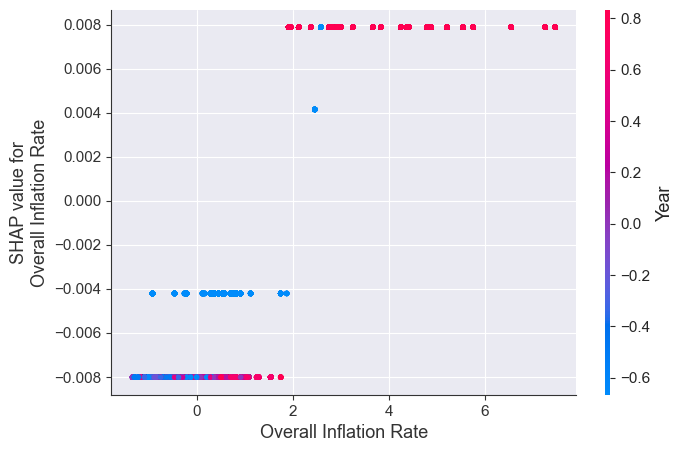

In [327]:
shap_values_array = shap_values.values  # Access SHAP values
feature_names = x_train.columns 
shap.dependence_plot('Overall Inflation Rate', shap_values_array, x_train,feature_names=feature_names)


In [328]:
shap.initjs()  # Initialize JavaScript visualization (necessary in Jupyter notebooks)
shap.force_plot(explainer.expected_value, shap_values[0], x_train.iloc[0])

ValueError: visualize() can only display Explanation objects (or arrays of them)!

In [206]:
# TODO:
# model creation and training, displaying results, shap :D